In [3]:
import re
import csv
from urllib.request import urlopen
from bs4 import BeautifulSoup
import sys
import warnings
from requests_html import HTMLSession

In [2]:
!pip install requests_html

  Running setup.py bdist_wheel for fake-useragent: started
  Running setup.py bdist_wheel for fake-useragent: finished with status 'done'
  Stored in directory: C:\Users\sushbiswal\AppData\Local\pip\Cache\wheels\5e\63\09\d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
  Running setup.py bdist_wheel for pyppeteer: started
  Running setup.py bdist_wheel for pyppeteer: finished with status 'done'
  Stored in directory: C:\Users\sushbiswal\AppData\Local\pip\Cache\wheels\34\e0\5d\070e22eceecf7ecd5fa4b86bbc18c1c7d0b90e02e9b57f35eb
  Running setup.py bdist_wheel for parse: started
  Running setup.py bdist_wheel for parse: finished with status 'done'
  Stored in directory: C:\Users\sushbiswal\AppData\Local\pip\Cache\wheels\9f\62\d1\c46b7452aa0b2c838080bdd462110cd6c61890151f916aa743
  Running setup.py bdist_wheel for bs4: started
  Running setup.py bdist_wheel for bs4: finished with status 'done'
  Stored in directory: C:\Users\sushbiswal\AppData\Local\pip\Cache\wheels\a0\b0\b2\4f80b9456b87a

In [4]:
session = HTMLSession()

In [5]:
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [7]:
url='https://www.amazon.in/dp/B07DJHY82F/ref=gbph_img_m-5_d182_b23b14bf?smid=A23AODI1X2CEAE&pf_rd_p=a3a8dc53-aeed-4aa1-88bb-72ce9ddad182&pf_rd_s=merchandised-search-5&pf_rd_t=101&pf_rd_i=1389401031&pf_rd_m=A1VBAL9TL5WCBF&pf_rd_r=P3FSQH2KEB3B5QQ1NQD5'

In [8]:
headers = {
        'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.90 Safari/537.36'
    }


In [11]:
response = session.get(url, headers=headers, verify=False)
soup = BeautifulSoup(response.content, 'html.parser')

<!DOCTYPE doctype html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script><!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/><link href="//images-eu.ssl-images-amazon.com" rel="dns-prefetch"/><link href="//m.media-amazon.com" rel="dns-prefetch"/><link href="//completion.amazon.com" rel="dns-prefetch"/><script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])};b[a].isSt
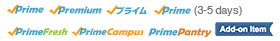
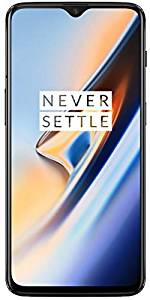

In [259]:
soup

In [257]:
### data frame for product details
product_info=[]
title=soup.find('span',id={'productTitle'}).text.strip()
for i in soup.findAll('div',id={'maxBuyBackDiscountSection'}):
    Exchangerate =''.join(k for k in i.text.split(".")[0] if k.isdigit())
for j in soup.findAll('span',id={'priceblock_ourprice'}):
    price=''.join(k for k in j.text.split(".")[0] if k.isdigit())
des=[]  
for f in soup.findAll('div',id={'feature-bullets'}):
    for g in f.findAll('span'):
        
        des.append(" ".join(g.text.split()))
        
details=','.join(r for r in des) 
review=soup.find('span',attrs={'class':'a-icon-alt'}).text
Numreview=soup.find('span',id={'acrCustomerReviewText'}).text
tech= soup.find('div',attrs={'class':'section techD'})
tlist=[]
for k in tech.find("table").findAll('tr'):
    #print(k.text.strip())
    tlist.append(" ".join(k.text.split()))
technicaldetails=','.join(r for r in tlist)
Color=[]
for i in soup.findAll('div',attrs={'id':'variation_color_name'}):
    for j in i.findAll("img", alt=True):
        Color.append(j['alt'])
colors=",".join(n for n in Color)
   
product_info.append([title,price,Exchangerate,details,review,Numreview,technicaldetails,colors])

In [258]:
product_info



[['OnePlus 6T (Midnight Black, 8GB RAM, 128GB Storage)',
  '37999',
  '13000',
  'Camera: 16+20 MP Dual rear camera with Optical Image Stabilization, Super slow motion, Nightscape and Studio Lighting | 16 MP front camera,Display: 6.41-inch(16.2 cms) Full HD+ Optic AMOLED display with 2340 x 1080 pixels resolution and an 86% screen-to-body ratio,Memory, Storage & SIM: 8GB RAM | 128GB storage | Dual nano SIM with dual standby (4G+4G),Screen Unlock: In-screen fingerprint sensor. The OnePlus 6T unlocks in 0.34s for a seamless and intuitive unlock experience,Operating System and Processor: OxygenOS based on Android 9.0 Pie with 2.8GHz Qualcomm Snapdragon 845 octa-core processor,Battery : 3700 mAh lithium-polymer battery with Fast Charge technology,Included in the Box: Screen Protector (pre-applied); Translucent Case; OnePlus Fast Charge Type-C Cable; OnePlus Fast Charge Power Adapter; SIM Tray Ejector; Quick Start Guide; Safety Information; OnePlus Type-C to 3.5mm Audio Jack Adapter,›',
  '

In [231]:
des=[]  
for f in soup.findAll('div',id={'feature-bullets'}):
    for g in f.findAll('span'):
        
        des.append(" ".join(g.text.split()))
        
details=','.join(r for r in des) 
details

'Camera: 16+20 MP Dual rear camera with Optical Image Stabilization, Super slow motion, Nightscape and Studio Lighting | 16 MP front camera,Display: 6.41-inch(16.2 cms) Full HD+ Optic AMOLED display with 2340 x 1080 pixels resolution and an 86% screen-to-body ratio,Memory, Storage & SIM: 8GB RAM | 128GB storage | Dual nano SIM with dual standby (4G+4G),Screen Unlock: In-screen fingerprint sensor. The OnePlus 6T unlocks in 0.34s for a seamless and intuitive unlock experience,Operating System and Processor: OxygenOS based on Android 9.0 Pie with 2.8GHz Qualcomm Snapdragon 845 octa-core processor,Battery : 3700 mAh lithium-polymer battery with Fast Charge technology,Included in the Box: Screen Protector (pre-applied); Translucent Case; OnePlus Fast Charge Type-C Cable; OnePlus Fast Charge Power Adapter; SIM Tray Ejector; Quick Start Guide; Safety Information; OnePlus Type-C to 3.5mm Audio Jack Adapter,›'

In [ ]:
<div id="maxBuyBackDiscountSection" class="a-section a-spacing-none a-padding-none show">
        <span>
            <span class="a-color-price">Up to <span class="currencyINR">&nbsp;&nbsp;</span> 13,000.00 off</span>
        </span>
        
    </div>

In [49]:
for i in soup.findAll('div',id={'maxBuyBackDiscountSection'}):
    print(i)

<div class="a-section a-spacing-none a-padding-none show" id="maxBuyBackDiscountSection">
<span>
<span class="a-color-price">Up to <span class="currencyINR">  </span> 13,000.00 off</span>
</span>
</div>


In [46]:
<span id="priceblock_ourprice" class="a-size-medium a-color-price priceBlockBuyingPriceString"><span class="currencyINR">&nbsp;&nbsp;</span> 37,999.00</span>

SyntaxError: invalid syntax (<ipython-input-46-f32c2cc2868d>, line 1)

In [48]:
for i in soup.findAll('span',id={'priceblock_ourprice'}):
    print(i.text)

   37,999.00


In [93]:
v=[]
for j in soup.findAll('div',id={'feature-bullets'}):
    #print(j.text)
   
    sentence = re.sub("^\s+|\s+$", "", j.text, flags=re.UNICODE)
    print(sentence)
    v.append("".join(sentence))
v   

Camera: 16+20 MP Dual rear camera with Optical Image Stabilization, Super slow motion, Nightscape and Studio Lighting | 16 MP front camera
							
						
 
							Display: 6.41-inch(16.2 cms) Full HD+ Optic AMOLED display with 2340 x 1080 pixels resolution and an 86% screen-to-body ratio
							
						
 
							Memory, Storage & SIM: 8GB RAM | 128GB storage | Dual nano SIM with dual standby (4G+4G)
							
						
 
							Screen Unlock: In-screen fingerprint sensor. The OnePlus 6T unlocks in 0.34s for a seamless and intuitive unlock experience
							
						
 
							Operating System and Processor: OxygenOS based on Android 9.0 Pie with 2.8GHz Qualcomm Snapdragon 845 octa-core processor
							
						
 
							Battery : 3700 mAh lithium-polymer battery with Fast Charge technology
							
						
 
							Included in the Box: Screen Protector (pre-applied); Translucent Case; OnePlus Fast Charge Type-C Cable; OnePlus Fast Charge Power Adapter; SIM Tray Ejector; Quick Start Guide; Safety I

['Camera: 16+20 MP Dual rear camera with Optical Image Stabilization, Super slow motion, Nightscape and Studio Lighting | 16 MP front camera\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\n \n\t\t\t\t\t\t\tDisplay:\xa06.41-inch(16.2 cms)\xa0Full HD+ Optic AMOLED display with 2340 x 1080 pixels resolution and an 86% screen-to-body ratio\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\n \n\t\t\t\t\t\t\tMemory, Storage & SIM: 8GB RAM | 128GB storage | Dual nano SIM with dual standby (4G+4G)\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\n \n\t\t\t\t\t\t\tScreen Unlock: In-screen fingerprint sensor. The OnePlus 6T unlocks in 0.34s for a seamless and intuitive unlock experience\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\n \n\t\t\t\t\t\t\tOperating System and Processor: OxygenOS based on Android 9.0 Pie with 2.8GHz Qualcomm Snapdragon 845 octa-core processor\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\n \n\t\t\t\t\t\t\tBattery : 3700 mAh lithium-polymer battery with Fast Charge technology\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\n \n\t\t\t\t\t\t\tIncluded in the Box: Screen Prote

In [100]:
import string
j.text.translate( ' \n\t\r')


'\n\n \n\t\t\t\t\t\t\tCamera: 16+20 MP Dual rear camera with Optical Image Stabilization, Super slow motion, Nightscape and Studio Lighting | 16 MP front camera\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\n \n\t\t\t\t\t\t\tDisplay:\xa06.41-inch(16.2 cms)\xa0Full HD+ Optic AMOLED display with 2340 x 1080 pixels resolution and an 86% screen-to-body ratio\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\n \n\t\t\t\t\t\t\tMemory, Storage & SIM: 8GB RAM | 128GB storage | Dual nano SIM with dual standby (4G+4G)\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\n \n\t\t\t\t\t\t\tScreen Unlock: In-screen fingerprint sensor. The OnePlus 6T unlocks in 0.34s for a seamless and intuitive unlock experience\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\n \n\t\t\t\t\t\t\tOperating System and Processor: OxygenOS based on Android 9.0 Pie with 2.8GHz Qualcomm Snapdragon 845 octa-core processor\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\n \n\t\t\t\t\t\t\tBattery : 3700 mAh lithium-polymer battery with Fast Charge technology\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\n \n\t\t\t\t\t\t\tIncluded in t

In [115]:
v=[]
for j in soup.findAll('div',id={'feature-bullets'}):
    for k in j.findAll('span'):
        print(k.text.strip())
        v.append(k.text.strip())

Camera: 16+20 MP Dual rear camera with Optical Image Stabilization, Super slow motion, Nightscape and Studio Lighting | 16 MP front camera
Display: 6.41-inch(16.2 cms) Full HD+ Optic AMOLED display with 2340 x 1080 pixels resolution and an 86% screen-to-body ratio
Memory, Storage & SIM: 8GB RAM | 128GB storage | Dual nano SIM with dual standby (4G+4G)
Screen Unlock: In-screen fingerprint sensor. The OnePlus 6T unlocks in 0.34s for a seamless and intuitive unlock experience
Operating System and Processor: OxygenOS based on Android 9.0 Pie with 2.8GHz Qualcomm Snapdragon 845 octa-core processor
Battery : 3700 mAh lithium-polymer battery with Fast Charge technology
Included in the Box: Screen Protector (pre-applied); Translucent Case; OnePlus Fast Charge Type-C Cable; OnePlus Fast Charge Power Adapter; SIM Tray Ejector; Quick Start Guide; Safety Information; OnePlus Type-C to 3.5mm Audio Jack Adapter
›


In [117]:
"".join(r for r in v)

'Camera: 16+20 MP Dual rear camera with Optical Image Stabilization, Super slow motion, Nightscape and Studio Lighting | 16 MP front cameraDisplay:\xa06.41-inch(16.2 cms)\xa0Full HD+ Optic AMOLED display with 2340 x 1080 pixels resolution and an 86% screen-to-body ratioMemory, Storage & SIM: 8GB RAM | 128GB storage | Dual nano SIM with dual standby (4G+4G)Screen Unlock: In-screen fingerprint sensor. The OnePlus 6T unlocks in 0.34s for a seamless and intuitive unlock experienceOperating System and Processor: OxygenOS based on Android 9.0 Pie with 2.8GHz Qualcomm Snapdragon 845 octa-core processorBattery : 3700 mAh lithium-polymer battery with Fast Charge technologyIncluded in the Box: Screen Protector (pre-applied); Translucent Case; OnePlus Fast Charge Type-C Cable; OnePlus Fast Charge Power Adapter; SIM Tray Ejector; Quick Start Guide; Safety Information; OnePlus Type-C to 3.5mm Audio Jack Adapter›'

In [ ]:
<div id="imgTagWrapperId" class="imgTagWrapper" style="height: 575.325px;">
	            <img alt="OnePlus 6T (Midnight Black, 8GB RAM, 128GB Storage)" src="https://images-na.ssl-images-amazon.com/images/I/61snu48HMFL._SY741_.jpg" data-old-hires="https://images-na.ssl-images-amazon.com/images/I/61snu48HMFL._SL1300_.jpg" class="a-dynamic-image  a-stretch-vertical" id="landingImage" data-a-dynamic-image="{&quot;https://images-na.ssl-images-amazon.com/images/I/61snu48HMFL._SY550_.jpg&quot;:[550,275],&quot;https://images-na.ssl-images-amazon.com/images/I/61snu48HMFL._SY606_.jpg&quot;:[606,303],&quot;https://images-na.ssl-images-amazon.com/images/I/61snu48HMFL._SY879_.jpg&quot;:[879,439],&quot;https://images-na.ssl-images-amazon.com/images/I/61snu48HMFL._SY679_.jpg&quot;:[679,339],&quot;https://images-na.ssl-images-amazon.com/images/I/61snu48HMFL._SY445_.jpg&quot;:[445,222],&quot;https://images-na.ssl-images-amazon.com/images/I/61snu48HMFL._SY500_.jpg&quot;:[500,250],&quot;https://images-na.ssl-images-amazon.com/images/I/61snu48HMFL._SY741_.jpg&quot;:[741,370]}" style="max-width: 287.5px; max-height: 575px;">
	        </div>

In [133]:
for i in soup.findAll('span',id={'productTitle'}):
    print(i.text.strip())

OnePlus 6T (Midnight Black, 8GB RAM, 128GB Storage)


In [138]:
(soup.find('span',id={'productTitle'})).text.strip()

'OnePlus 6T (Midnight Black, 8GB RAM, 128GB Storage)'

In [142]:
<span class="a-icon-alt">4.5 out of 5 stars</span>

SyntaxError: invalid syntax (<ipython-input-142-4019ca80eb1b>, line 1)

In [149]:
soup.find('span',attrs={'class':'a-icon-alt'}).text

'4.5 out of 5 stars'

In [ ]:
<span id="acrCustomerReviewText" class="a-size-base">15,128 customer reviews</span>

In [153]:
soup.find('span',id={'acrCustomerReviewText'}).text

'15,128 customer reviews'

In [201]:
tech= soup.find('div',attrs={'class':'section techD'})
tlist=[]
for k in tech.find("table").findAll('tr'):
    print(k.text.strip())
    tlist.append(k)
            
            

OS Android
RAM 8 GB
Item Weight186 g
Product Dimensions15.8 x 0.8 x 7.5 cm
Batteries:1 Lithium Polymer batteries required. (included)
Item model numberA6010
Wireless communication technologies Bluetooth;WiFi Hotspot
Connectivity technologies 2G;3G;GPS;GLONASS;Galileo;BeiDou;USB 2.0;OTG;WiFi 802.11 a/b/g/n/ac
Special features SIM;GPS;Music Player;Video Player;E-mail
Other camera features 16MP (Front camera)
Form factorTouchscreen Phone
Weight 186 Grams
Colour Midnight Black
Battery Power Rating 3700
Whats in the box Handset, Screen Protector (pre-applied), Translucent Case, OnePlus Fast Charge Type-C Cable, OnePlus Fast Charge Power Adapter, SIM Tray Ejector, Quick Start Guide, Safety Information and Type-C to 3.5mm Audio Jack Adapter



'Mirror Black,Midnight Black,Speed Orange'

<img alt="OnePlus 6T (Midnight Black, 8GB RAM, 128GB Storage)" class="a-dynamic-image a-stretch-vertical" data-a-dynamic-image='{"https://images-na.ssl-images-amazon.com/images/I/61snu48HMFL._SY550_.jpg":[550,275],"https://images-na.ssl-images-amazon.com/images/I/61snu48HMFL._SY606_.jpg":[606,303],"https://images-na.ssl-images-amazon.com/images/I/61snu48HMFL._SY879_.jpg":[879,439],"https://images-na.ssl-images-amazon.com/images/I/61snu48HMFL._SY679_.jpg":[679,339],"https://images-na.ssl-images-amazon.com/images/I/61snu48HMFL._SY445_.jpg":[445,222],"https://images-na.ssl-images-amazon.com/images/I/61snu48HMFL._SY500_.jpg":[500,250],"https://images-na.ssl-images-amazon.com/images/I/61snu48HMFL._SY741_.jpg":[741,370]}' data-old-hires="https://images-na.ssl-images-amazon.com/images/I/61snu48HMFL._SL1300_.jpg" id="landingImage" src="









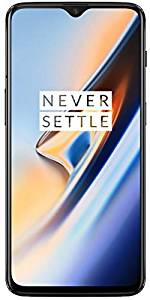

" style="max-width:439px;max-height:879px;"/>
None
None


In [266]:
for i in soup.findAll('div',attrs={'class':'imgTagWrapper'}):
    print(i.find('img'))

[<img alt="" height="1" onload="window.ue_sbl &amp;&amp; window.ue_sbl();" src="//fls-eu.amazon.in/1/batch/1/OP/A21TJRUUN4KGV:259-7562614-0537830:7DCA9M3Z0ECRRSV96XK1$uedata=s:%2Fgp%2Fuedata%3Fstaticb%26id%3D7DCA9M3Z0ECRRSV96XK1:0" style="display:none;visibility:hidden;" width="1"/>,
 <img alt="" src="https://images-eu.ssl-images-amazon.com/images/G/31/gno/sprites/nav-sprite-global_bluebeacon-V3-1x_optimized._CB468962293_.png" style="display:none"/>,
 <img alt="Amazon App Contest" border="0" height="39px" src="https://images-eu.ssl-images-amazon.com/images/G/31/x-locale/common/transparent-pixel._CB386942716_.gif" usemap="#nav-swm-holiday-map" width="400px"/>,
 <img alt="Electronics" class="nav-categ-image" src="https://images-eu.ssl-images-amazon.com/images/G/31/img18/Electronics/Megamenu/Megamenu_Electronics_top._CB502737186_.png"/>,
 <img align="left" alt="100% PP" border="0" src="https://m.media-amazon.com/images/G/31/img13/rcx-events/trust/244x66_Desktop_DP_Trust.jpg" usemap="#Trus
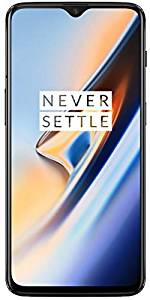

In [268]:
soup.findAll('img')

In [236]:
<div class="imgTagWrapper" style="height: 575px;">
            <img src="https://images-na.ssl-images-amazon.com/images/I/51%2BWKvgaFJL._SY606_.jpg" class="a-dynamic-image a-stretch-vertical" id="" style="max-height: 575px; max-width: 291.682px;" data-old-hires="https://images-na.ssl-images-amazon.com/images/I/51%2BWKvgaFJL._SL1000_.jpg" data-a-manual-replacement="true">
        </div>

<ul class="a-unordered-list a-horizontal a-size-small">
<li><span class="a-list-item">
<a class="a-link-normal a-color-tertiary" href="/electronics/b/ref=dp_bc_aui_C_1/259-7562614-0537830?ie=UTF8&amp;node=976419031">
                Electronics
            </a>
</span></li>
<li class="a-breadcrumb-divider"><span class="a-list-item a-color-tertiary">
             ›
         </span></li>
<li><span class="a-list-item">
<a class="a-link-normal a-color-tertiary" href="/mobile-phones/b/ref=dp_bc_aui_C_2/259-7562614-0537830?ie=UTF8&amp;node=1389401031">
                Mobiles &amp; Accessories
            </a>
</span></li>
<li class="a-breadcrumb-divider"><span class="a-list-item a-color-tertiary">
             ›
         </span></li>
<li><span class="a-list-item">
<a class="a-link-normal a-color-tertiary" href="/smartphones-basic-mobiles/b/ref=dp_bc_aui_C_3/259-7562614-0537830?ie=UTF8&amp;node=1389432031">
                Smartphones &amp; Basic Mobiles
            </a>
</span></li>
<li cla

# Reviews





In [314]:
rurl='https://www.amazon.in/OnePlus-Midnight-Black-256GB-Storage/product-reviews/B07DJCJBRD/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber=1'
response_r = session.get(rurl, headers=headers, verify=False)
soup_r = BeautifulSoup(response_r.content, 'html.parser')

In [381]:
import pandas as pd
reviewlist=pd.DataFrame()
author=[]
stars=[]
title=[]
body=[]
date=[]
for k in soup_r.findAll('span',attrs={'class':'a-profile-name'}):
    author.append(k.text)

for j in soup_r.findAll("i",attrs={'data-hook':'review-star-rating'}):
        stars.append(j.text)
        
for j in soup_r.findAll("a",attrs={'data-hook':'review-title'}):
        title.append(j.text.replace(" ",""))
for j in soup_r.findAll("span",attrs={'data-hook':'review-body'}):
        body.append(j.text.replace(" ",""))
for j in soup_r.findAll("span",attrs={'data-hook':'review-date'}):
        date.append(j.text)
        

    
    

In [375]:

for j in soup_r.findAll("a",attrs={'class':'a-profile-name'}):
        print(j.text)

In [374]:
len(author),len(stars),len(title),len(body),len(date)

(12, 10, 10, 10, 10)

In [380]:
author=

In [382]:
pd.DataFrame({'author':author[2:],'stars':stars,'title':title,'body':body,'date':date})

,author,stars,title,body,date
0,Amazon Customer,2.0 out of 5 stars,Notsatisfied\n,Phoneisgood..butfingerprintreaderreallybad.Bat...,30 April 2019
1,Dharmendra Sourv,5.0 out of 5 stars,🔥\n,BESTPHONEINTHEWORLDRIGHTNOWINTHISBUDGET!🔥\n,29 April 2019
2,Santanu,2.0 out of 5 stars,Previousmodelshadmuchbetterquality!\n,Camerakeepsoncrashing.Ihadtorepairitexactlywit...,29 April 2019
3,Akash Pandey,5.0 out of 5 stars,Amazingphone!!\n,Fingerprintsensorisnotexactlywatweexpectfromon...,29 April 2019
4,Vishnu v menon,5.0 out of 5 stars,Niceproduct\n,"Thisproductisawsome,theonlythingthatneedtobeim...",28 April 2019
5,Rakesh Kumar Gupta,5.0 out of 5 stars,Numberonemobile\n,"Awasome,MindBlowing,Superb\n",28 April 2019
6,Ramavtar Bhanwariya,5.0 out of 5 stars,Everythingisgood\n,OneplusalliswellIloveitOnePlusGoodlookfeelgood\n,28 April 2019
7,Manikant tomar,1.0 out of 5 stars,Probleminincomingcalll\n,Iamfaceingaveryseriousprobleminmyphone.WhenIge...,28 April 2019
8,Amazon Customer,5.0 out of 5 stars,Worthsmartphone\n,Bestphonebtnonotificationlednd3.5jackrestisall...,28 April 2019
9,Rakesh S.,4.0 out of 5 stars,Nice\n,Nicephone\n,28 April 2019


In [318]:
for i in soup_r.findAll("a",attrs={'class':'a-profile'}):
    for k in i.findAll("span",attrs={'class':'a-profile-name'}):
             print(k.text)
        

Tanmay Shukla
Surbhi Garg
Amazon Customer
Dharmendra Sourv
Santanu
Akash Pandey
Vishnu v menon
Rakesh Kumar Gupta 
Ramavtar Bhanwariya
Manikant tomar
Amazon Customer
Rakesh S.


In [ ]:
<div id="customer_review-R3A9RJPTCZQIM6" class="a-section celwidget" data-cel-widget="customer_review-R3A9RJPTCZQIM6"><div data-hook="genome-widget" class="a-row a-spacing-mini"><a href="/gp/profile/amzn1.account.AE463IHDHAAELOLPWJ3H4EM4G6SA/ref=cm_cr_arp_d_gw_btm?ie=UTF8" class="a-profile" data-a-size="small"><div aria-hidden="true" class="a-profile-avatar-wrapper"><div class="a-profile-avatar"><img src="https://images-eu.ssl-images-amazon.com/images/S/amazon-avatars-global/default._CR0,0,1024,1024_SX48_.png" class="" data-src="https://images-eu.ssl-images-amazon.com/images/S/amazon-avatars-global/default._CR0,0,1024,1024_SX48_.png"><noscript><img src="https://images-eu.ssl-images-amazon.com/images/S/amazon-avatars-global/default._CR0,0,1024,1024_SX48_.png"></noscript></div></div><div class="a-profile-content"><span class="a-profile-name">Amazon Customer</span></div></a></div><div class="a-row"><a class="a-link-normal" title="2.0 out of 5 stars" href="/gp/customer-reviews/R3A9RJPTCZQIM6/ref=cm_cr_arp_d_rvw_ttl?ie=UTF8&amp;ASIN=B07DJCJBRD"><i data-hook="review-star-rating" class="a-icon a-icon-star a-star-2 review-rating"><span class="a-icon-alt">2.0 out of 5 stars</span></i></a><span class="a-letter-space"></span><a data-hook="review-title" class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" href="/gp/customer-reviews/R3A9RJPTCZQIM6/ref=cm_cr_arp_d_rvw_ttl?ie=UTF8&amp;ASIN=B07DJCJBRD"><span class="">Not satisfied</span>
        </a></div><span data-hook="review-date" class="a-size-base a-color-secondary review-date">30 April 2019</span><div class="a-row a-spacing-mini review-data review-format-strip"><a data-hook="format-strip" class="a-size-mini a-link-normal a-color-secondary" href="/OnePlus-Midnight-Black-256GB-Storage/product-reviews/B07DJCJBRD/ref=cm_cr_arp_d_rvw_fmt?ie=UTF8&amp;reviewerType=all_reviews&amp;sortBy=recent&amp;formatType=current_format">Size: 8+256 GB<i class="a-icon a-icon-text-separator" role="img" aria-label="|"></i>Colour: Midnight Black</a><i class="a-icon a-icon-text-separator" role="img" aria-label="|"></i><span class="a-declarative" data-action="reviews:filter-action:push-state" data-reviews:filter-action:push-state="{}"><a data-reftag="cm_cr_arp_d_rvw_rvwer" data-reviews-state-param="{&quot;pageNumber&quot;:&quot;1&quot;,&quot;reviewerType&quot;:&quot;avp_only_reviews&quot;}" class="a-link-normal" href="/OnePlus-Midnight-Black-256GB-Storage/product-reviews/B07DJCJBRD/ref=cm_cr_arp_d_rvw_rvwer?ie=UTF8&amp;reviewerType=avp_only_reviews&amp;sortBy=recent"><span data-hook="avp-badge" class="a-size-mini a-color-state a-text-bold">Verified Purchase</span></a></span></div><div class="a-row a-spacing-small review-data"><span data-hook="review-body" class="a-size-base review-text review-text-content"><span class="">Phone is good ..but fingerprint reader really bad .<br>Battery life is very poor . Camera quality also not satisfied.<br>Currier service is really bad. Received phone after 4 days even having prime membership</span>
            </span></div><div class="a-row review-comments comments-for-R3A9RJPTCZQIM6"><div data-reftag="cm_cr_arp_d_cmt_opn" aria-live="polite" data-a-expander-name="review_comment_expander" class="a-row a-expander-container a-expander-inline-container cr-vote-action-bar"><span class="cr-vote" data-hook="review-voting-widget">

  <div class="a-row a-spacing-small"><span data-hook="helpful-vote-statement" class="a-size-base a-color-tertiary cr-vote-text">One person found this helpful</span></div><div class="cr-helpful-button aok-float-left">
      <span class="a-button a-button-base" id="a-autoid-9"><span class="a-button-inner"><a href="https://www.amazon.in/ap/signin?openid.return_to=https%3A%2F%2Fwww.amazon.in%2FOnePlus-Midnight-Black-256GB-Storage%2Fproduct-reviews%2FB07DJCJBRD%2Fref%3Dcm_cr_arp_d_vote_lft%3Fie%3DUTF8%26voteInstanceId%3DR3A9RJPTCZQIM6%26voteValue%3D1%26reviewerType%3Dall_reviews%26csrfT%3DgvuKu1bm1DHl%252BQefH8Nln6WuboAzb4XxD5szTRAAAAABAAAAAFzILwRyYXcAAAAA%252B4kUEk%252F7iMGR3xPcX6iU%26sortBy%3Drecent&amp;openid.identity=http%3A%2F%2Fspecs.openid.net%2Fauth%2F2.0%2Fidentifier_select&amp;openid.claimed_id=http%3A%2F%2Fspecs.openid.net%2Fauth%2F2.0%2Fidentifier_select&amp;openid.assoc_handle=inflex&amp;openid.mode=checkid_setup&amp;openid.ns=http%3A%2F%2Fspecs.openid.net%2Fauth%2F2.0" data-hook="vote-helpful-button" class="a-button-text" role="button" id="a-autoid-9-announce"><div class="cr-helpful-text">
          Helpful</div>
      </a></span></span></div>
  </span>

<i class="a-icon a-icon-text-separator" role="img" aria-label="|"></i><a href="javascript:void(0)" data-action="a-expander-toggle" class="a-expander-header a-declarative a-expander-inline-header a-link-expander" data-a-expander-toggle="{&quot;allowLinkDefault&quot;:true, &quot;expand_prompt&quot;:&quot;&quot;, &quot;collapse_prompt&quot;:&quot;&quot;}"><i class="a-icon a-icon-expand"></i><span class="a-expander-prompt"><span class="review-comment-total aok-hidden">0</span><span class="a-size-base"><span class="a-declarative" data-action="reviews:ajax-post" data-reviews:ajax-post="{&quot;removeOnLoadSelector&quot;:&quot;.submission-button-for-R3A9RJPTCZQIM6&quot;,&quot;indicatorSelector&quot;:&quot;.comment-submission-loading-R3A9RJPTCZQIM6&quot;,&quot;params&quot;:{&quot;reviewId&quot;:&quot;R3A9RJPTCZQIM6&quot;},&quot;showOnFailureSelector&quot;:&quot;.comment-submission-error-R3A9RJPTCZQIM6&quot;,&quot;url&quot;:&quot;/hz/reviews-render/ajax/comment-submission/get/ref=cm_cr_arp_d_btn&quot;}">Comment</span></span></span></a><span class="cr-footer-line-height">
      <span><i class="a-icon a-icon-text-separator" role="img" aria-label="|"></i><span class="a-declarative" data-action="cr-popup" data-cr-popup="{&quot;width&quot;:&quot;580&quot;,&quot;title&quot;:&quot;ReportAbuse&quot;,&quot;url&quot;:&quot;/hz/reviews-render/report-abuse?ie=UTF8&amp;voteDomain=Reviews&amp;ref=cm_cr_arp_d_rvw_hlp&amp;csrfT=gvuKu1bm1DHl%2BQefH8Nln6WuboAzb4XxD5szTRAAAAABAAAAAFzILwRyYXcAAAAA%2B4kUEk%2F7iMGR3xPcX6iU&amp;entityId=R3A9RJPTCZQIM6&amp;sessionId=259-4855293-9034748&quot;,&quot;height&quot;:&quot;380&quot;}"><a class="a-size-base a-link-normal a-color-secondary report-abuse-link a-text-normal" href="/hz/reviews-render/report-abuse?ie=UTF8&amp;voteDomain=Reviews&amp;ref=cm_cr_arp_d_rvw_hlp&amp;csrfT=gvuKu1bm1DHl%2BQefH8Nln6WuboAzb4XxD5szTRAAAAABAAAAAFzILwRyYXcAAAAA%2B4kUEk%2F7iMGR3xPcX6iU&amp;entityId=R3A9RJPTCZQIM6&amp;sessionId=259-4855293-9034748">Report abuse</a></span></span></span>

    <div aria-expanded="false" class="a-expander-content a-spacing-top-base a-spacing-large a-expander-inline-content a-expander-inner" style="display:none"><div class="a-column a-span12 a-text-right a-spacing-base"><span class="a-declarative" data-action="reviews:ajax-post" data-reviews:ajax-post="{&quot;removeOnLoadSelector&quot;:&quot;.submission-button-for-R3A9RJPTCZQIM6&quot;,&quot;indicatorSelector&quot;:&quot;.comment-submission-loading-R3A9RJPTCZQIM6&quot;,&quot;params&quot;:{&quot;reviewId&quot;:&quot;R3A9RJPTCZQIM6&quot;},&quot;showOnFailureSelector&quot;:&quot;.comment-submission-error-R3A9RJPTCZQIM6&quot;,&quot;url&quot;:&quot;/hz/reviews-render/ajax/comment-submission/get/ref=cm_cr_arp_d_btn&quot;}"><span class="a-button a-button-base open-comment-submission-button submission-button-for-R3A9RJPTCZQIM6 aok-hidden" id="a-autoid-10"><span class="a-button-inner"><input data-reftag="cm_cr_arp_d_cmt_submn" class="a-button-input" type="submit" aria-labelledby="a-autoid-10-announce"><span class="a-button-text" aria-hidden="true" id="a-autoid-10-announce">Comment</span></span></span></span></div><span id="comment-submission-for-R3A9RJPTCZQIM6">

  <div class="a-section a-spacing-extra-large a-spacing-top-medium a-text-center comment-submission-loading-R3A9RJPTCZQIM6 comment-submission-metadata"><span class="a-spinner a-spinner-medium a-spacing-top-medium a-spacing-extra-large"></span></div><div class="a-section a-spacing-extra-large a-spacing-top-medium a-text-center comment-submission-error-R3A9RJPTCZQIM6 comment-submission-metadata"><div class="a-box a-alert a-alert-error cr-error" aria-live="assertive" role="alert"><div class="a-box-inner a-alert-container"><h4 class="a-alert-heading">There was a problem loading comments right now. Please try again later.</h4><i class="a-icon a-icon-alert"></i><div class="a-alert-content"></div></div></div></div></span>
<div class="a-row a-spacing-mini review-comments-header aok-hidden"><ul class="a-viewoptions-list a-viewoptions-section a-span12">
    <div class="a-row a-spacing-none a-grid-vertical-align a-grid-center"><div class="a-column a-span6"><span class="a-size-base a-viewoptions-list-label">Showing <span class="review-comment-count">0</span> comments</span></div><div class="a-column a-span6 a-text-right a-span-last"><span class="a-size-base a-viewoptions-list-label">Sort by:<span class="a-letter-space"></span></span><span class="a-declarative" data-action="reviews:sort-comments" data-reviews:sort-comments="{}"><li class="sort-newest a-viewoptions-list-item a-selected a-color-state">
            <a data-reftag="cm_cr_arp_d_cmt_lft" class="a-link-normal a-selected a-color-state" href="#">Newest</a></li>
          <li class="sort-oldest a-viewoptions-list-item">
            <a data-reftag="cm_cr_arp_d_cmt_rgt" class="a-link-normal" href="#">Oldest</a></li>
        </span></div></div></ul>
</div><div class="a-section a-spacing-extra-large a-spacing-top-medium a-text-center comment-load-error aok-hidden"><div class="a-box a-alert a-alert-error cr-error" aria-live="assertive" role="alert"><div class="a-box-inner a-alert-container"><h4 class="a-alert-heading">There was a problem loading comments right now. Please try again later.</h4><i class="a-icon a-icon-alert"></i><div class="a-alert-content"></div></div></div></div><div id="R3A9RJPTCZQIM6" class="a-section a-spacing-none review-comments"></div><div class="a-spinner-wrapper comment-loading aok-hidden a-spacing-top-medium a-spacing-extra-large"><span class="a-spinner a-spinner-medium"></span></div><hr class="a-spacing-none a-spacing-top-large a-divider-normal"></div></div></div></div>